# Image Retrieval Using a Neural Network Model

_In this notebook, I demonstrate how a neural network trained to recognize hand-written digits can be used to perform content-based image retrieval. By providing a never-before seen query image to the model, I use its output to retrieve the most "similar" images from a known database of images._

## Import 
Import the requisite libraries and modules

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import data_prep
from image_retrieval import load_encoder, compute_image_embeddings, show_n_closest_images

Using TensorFlow backend.


## Load the data
Split into training and testing data. The test set has never been seen by the model.

In [2]:
x_train, y_train, x_test, y_test = data_prep.load_data()

## Load the encoder model
Load the pre-trained encoder model

In [3]:
encoder = load_encoder()

## Compute Historical Image Embeddings
Use the encoder model to compute embeddings of historical images.  For this example, we use the images that the model was trained on as the historical images. These embeddings are needed for the model to do its similarity comparison. This step takes a few seconds for all 60000 training images, but in practice, it only needs to be done once, since an image's embeddings do not change over time.

In [4]:
%%time
historical_embeddings = compute_image_embeddings(encoder, x_train)

CPU times: user 18.4 s, sys: 845 ms, total: 19.2 s
Wall time: 3.95 s


## Assign a test image
Take a single sample image from the test set to test out the model. Since this sample image is coming from the test set, we can be sure that the model has not seen it before.

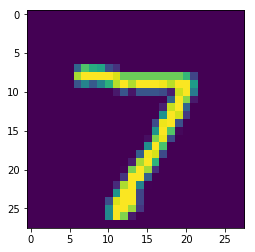

In [5]:
img = x_test[0]
plt.imshow(np.reshape(img, (28, 28)))
plt.show()

The sample image is a 7.  If we supply the model with this image, it should return the most similar images from the database, which we expect to also be 7's. We can tell the model how many images to return...

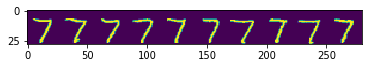

CPU times: user 130 ms, sys: 26.7 ms, total: 157 ms
Wall time: 156 ms


In [6]:
%%time
show_n_closest_images(query_img=img,
                      n=10,
                      encoder=encoder,
                      historical_embeddings=historical_embeddings,
                      historical_images=x_train)

It worked! Each of the retrieved images is also a 7.

## Try to trick the model

Let's try to trick the model by adding some noise to the image before we pass it on:

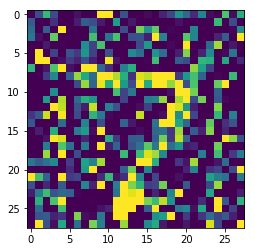

In [7]:
noisy_img = data_prep.add_noise(img, noise_factor=.5)
plt.imshow(np.reshape(noisy_img, (28, 28)))
plt.show()

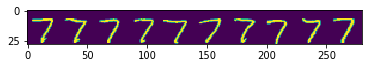

In [8]:
show_n_closest_images(query_img=noisy_img,
                      n=10,
                      encoder=encoder,
                      historical_embeddings=historical_embeddings,
                      historical_images=x_train)

It still worked!  All of the retrieved images are still 7.  Now, Let's try iteratively increasing the noise.  Surely it will eventually overwhelm the model:

noise factor =  0.5 :


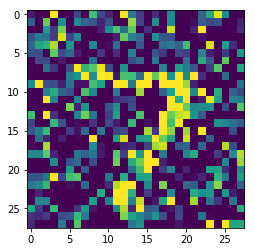

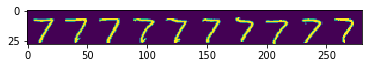

noise factor =  0.55 :


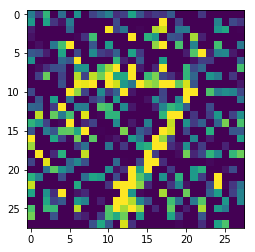

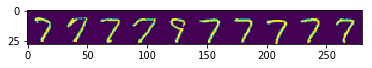

noise factor =  0.6 :


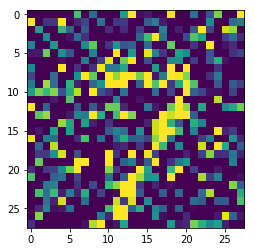

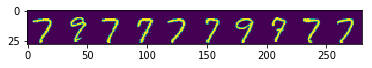

noise factor =  0.65 :


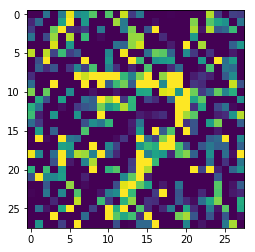

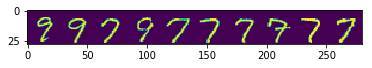

noise factor =  0.7 :


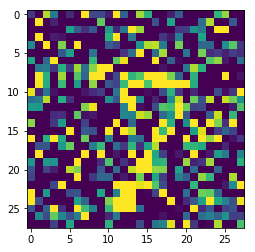

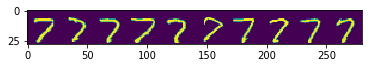

noise factor =  0.75 :


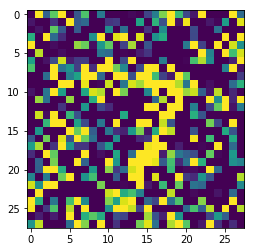

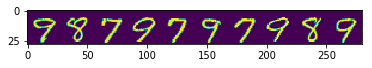

noise factor =  0.8 :


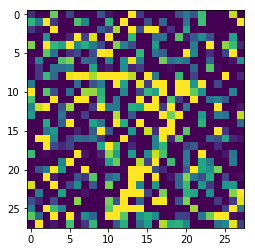

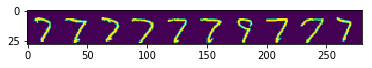

noise factor =  0.85 :


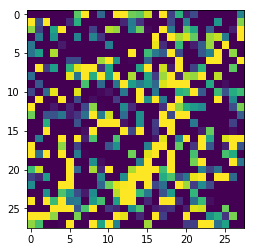

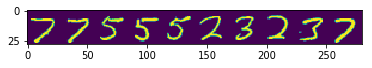

noise factor =  0.9 :


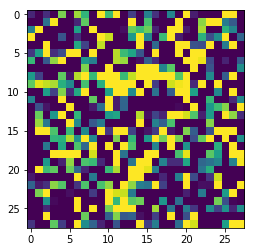

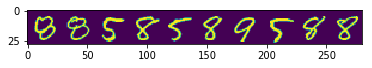

noise factor =  0.95 :


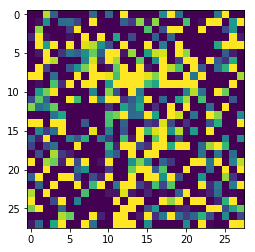

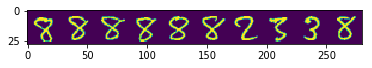

In [9]:
for noise_level in np.arange(.5, 1, .05):
    print('===================')
    print('noise factor = ', noise_level, ':')
    noisy_img = data_prep.add_noise(img, noise_factor=noise_level)
    plt.imshow(np.reshape(noisy_img, (28, 28)))
    plt.show()
    show_n_closest_images(query_img=noisy_img,
                          n=10,
                          encoder=encoder,
                          historical_embeddings=historical_embeddings,
                          historical_images=x_train)

The model seems to start making mistakes when the noise_factor exceeds 0.6.